In [ ]:
!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git

Cloning into 'Traditional-Chinese-Handwriting-Dataset'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 174 (delta 5), reused 1 (delta 1), pack-reused 167
Receiving objects: 100% (174/174), 77.40 MiB | 23.77 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Updating files: 100% (11/11), done.


In [ ]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties

from matplotlib.font_manager import FontProperties

default_type = findfont( FontProperties( family=FontProperties().get_family() ) )
ttf_path = '/'.join( default_type.split('/')[:-1] )

os.chdir( '/content' )
if not os.path.exists( '/content/matplotlib_Display_Chinese_in_Colab' ):
    !git clone https://github.com/YenLinWu/matplotlib_Display_Chinese_in_Colab

os.chdir( '/content/matplotlib_Display_Chinese_in_Colab' )
for item in os.listdir():
    if item.endswith( '.ttf' ):
        msj_ttf_path = os.path.abspath( item )
        msj_name = msj_ttf_path.split('/')[-1]

try:
    shutil.move( msj_ttf_path, ttf_path )
except:
    pass
finally:
    os.chdir( '/content' )
    shutil.rmtree( '/content/matplotlib_Display_Chinese_in_Colab' )
font = FontProperties( fname=ttf_path+'/'+msj_name )

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import *

print( 'Python Version: ', python_version() )
print( 'TensorFlow Version: ', tf.__version__ )
print( 'Keras Version: ', tf.keras.__version__ )

Cloning into 'matplotlib_Display_Chinese_in_Colab'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 13.26 MiB | 4.83 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Python Version:  3.10.6
TensorFlow Version:  2.12.0
Keras Version:  2.12.0


In [ ]:
import os
import zipfile
import shutil

OutputFolder = '/content/Handwritten_Data'

In [ ]:
if not os.path.exists(OutputFolder):
  os.mkdir(OutputFolder)
  print( f'Create the new "{OutputFolder}" folder' )

os.chdir(OutputFolder)

### 檢查路徑
!pwd

Create the new "/content/Handwritten_Data" folder
/content/Handwritten_Data


In [ ]:
CompressedFiles = []

os.chdir('/content/Traditional-Chinese-Handwriting-Dataset/data')

for item in os.listdir():
  if item.endswith('.zip'): # Check for ".zip" extension.
    file_path = os.path.abspath(item) # Get full path of the compressed file.
    CompressedFiles.append(file_path)

for file in CompressedFiles:
  # Construct a ZipFile object with the filename, and then extract it.
  zip_ref = zipfile.ZipFile(file).extractall(OutputFolder)

  source_path = OutputFolder + '/cleaned_data(50_50)'
  img_list = os.listdir(source_path)

  for img in img_list:
      shutil.move(source_path + '/' + img, OutputFolder) # Move a file to another location.

  shutil.rmtree(OutputFolder + '/cleaned_data(50_50)')
  print(f'Decompress successfully {file} ......')

print( 'Moving images according to traditional Chinese characters......' )

ImageList = os.listdir(OutputFolder)
ImageList = [img for img in ImageList if len(img)>1]
WordList = list(set([w.split('_')[0] for w in ImageList]))

for w in WordList:
  try:
    os.chdir(OutputFolder) # Change the current working directory to OutputPath.
    os.mkdir(w) # Create the new word folder in OutputPath.
    MoveList = [img for img in ImageList if w in img]

  except:
    os.chdir(OutputFolder)
    MoveList = [ img for img in ImageList if w in img ]

  finally:
    for img in MoveList:
      old_path = OutputFolder + '/' + img
      new_path = OutputFolder + '/' + w + '/' + img
      shutil.move( old_path, new_path )

print( 'Data Deployment completed.' )

Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-003.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-004.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-002.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-001.zip ......
Moving images according to traditional Chinese characters......
Data Deployment completed.


In [ ]:
a=0
b=0

for item in os.listdir(OutputFolder):
  a += 1
  for i in os.listdir(OutputFolder + '/' + item):
    b +=1


print('total ' + str(a) + ' words / total ' + str(b) + ' samples')
print('sample per word ' + str(b/a))

total 4803 words / total 250712 samples
sample per word 52.19904226525089


Making testing data

In [ ]:
os.chdir('/content')
os.mkdir('Traditional_Chinese_Testing_Data')
os.chdir('/content/Traditional_Chinese_Testing_Data')

In [ ]:
!git clone https://github.com/AI-FREE-Team/Handwriting-Chinese-Characters-Recognition

Cloning into 'Handwriting-Chinese-Characters-Recognition'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 78 (delta 31), reused 41 (delta 9), pack-reused 0
Unpacking objects: 100% (78/78), 2.97 MiB | 4.37 MiB/s, done.


In [ ]:
list = os.listdir('/content/Handwritten_Data')
print(len(list)) # 4803
print(list)
random_list = []
for i in range(1500):
  random_list.append(list[i])
print(random_list)

4803
['趴', '踱', '友', '選', '湖', '釣', '削', '搜', '絲', '慇', '影', '娌', '閭', '申', '梔', '失', '犖', '餓', '什', '薪', '得', '臍', '彌', '夫', '檳', '噎', '璦', '駱', '繆', '哥', '証', '戾', '掣', '諾', '肝', '方', '黠', '洽', '皚', '輪', '礫', '鋤', '勞', '抨', '鋪', '賤', '鬲', '鏗', '馨', '淹', '暉', '啣', '樸', '書', '直', '謊', '瞟', '斧', '嗚', '向', '湔', '磚', '拳', '汕', '奎', '檔', '淑', '桐', '尹', '鼙', '賈', '皮', '緘', '坪', '胎', '松', '帝', '哩', '鷓', '閉', '崔', '趾', '孺', '潛', '響', '蛔', '癥', '龔', '剿', '搗', '峭', '鐘', '僅', '利', '廝', '蟹', '俸', '抗', '汀', '程', '姘', '羋', '唐', '侵', '優', '枇', '祆', '奄', '裂', '卻', '妳', '曖', '務', '巧', '碧', '眾', '籌', '宏', '坡', '清', '捻', '亂', '腥', '卡', '溪', '豆', '瑩', '炊', '脂', '僥', '勇', '夔', '槳', '羞', '力', '鷂', '鳴', '回', '戊', '唯', '吳', '技', '糊', '存', '添', '宵', '值', '鈕', '礬', '齣', '狠', '几', '顎', '杵', '懾', '蠶', '餐', '蜀', '柩', '戳', '蠅', '溜', '濁', '仙', '拮', '課', '策', '靦', '貸', '滄', '弔', '釗', '翹', '跋', '玀', '蔭', '浚', '推', '擻', '命', '娘', '雖', '捨', '研', '陀', '波', '里', '蚪', '液', '湮', '模', '撼', '佐', '舊', '齋', '表', '肩', '覺', '磋',

In [ ]:
RawDataPath = '/content/Handwritten_Data'
TrainingDataPath = '/content/train'
TestingDataPath = '/content/test'

os.chdir( RawDataPath )
print( 'Current working directory:', os.getcwd() )

Current working directory: /content/Handwritten_Data


In [ ]:
SelectedWords = ['一', '乙', '丁', '七', '九', '了', '二', '人', '入', '八', '刀', '力', '十', '又', '下', '丈', '上', '久', '也', '千', '叉', '口', '土', '大', '女', '寸', '小', '山', '已', '弓', '才', '不', '中', '之', '井', '互', '五', '仍', '元', '內', '六', '公', '分', '切', '匹', '升', '天', '太', '孔', '少', '尺', '戶', '手', '支', '斤', '方', '日', '月', '木', '欠', '止', '比', '毛', '水', '火', '父', '片', '牙', '牛', '犬', '王', '丙', '主', '付', '他', '代', '令', '冊', '冬', '出', '加', '功', '包', '北', '半', '卡', '去', '可', '右', '叫', '另', '只', '台', '句', '四', '外', '失', '奶', '它', '巧', '左', '市', '布', '平', '打', '本', '未', '正', '母', '玉', '瓜', '瓦', '生', '用', '田', '由', '甲', '白', '皮', '禾', '立', '丟', '両', '交', '仿', '件', '份', '光', '兇', '共', '再', '冰', '列', '划', '印', '同', '吊', '吐', '吋', '各', '向', '名', '合', '吃', '因', '回', '地', '在', '多', '好', '她', '字', '存', '守', '安', '尖', '年', '忙', '收', '早', '曲', '有', '朵', '次', '死', '汗', '江', '池', '百', '竹', '米', '羊', '老', '考', '而', '耳', '肉', '至', '舟', '血', '行', '衣', '西', '串', '位', '住', '伸', '似', '作', '你', '低', '克', '兵', '冷', '別', '刨', '即', '卵', '吞', '否', '呎', '吧', '告', '吹', '吻', '吸', '吵', '呔', '呀', '吱', '困', '坐', '壯', '夾', '完', '局', '尿', '尾', '弄', '形', '忘', '忍', '快', '我', '抄', '抖', '扶', '把', '找', '批', '抓', '改', '更', '束', '杆', '步', '每', '求', '沙', '沉', '沖', '沒', '牠', '狂', '男', '盯', '良', '初', '見', '角', '豆', '貝', '走', '身', '車', '那', '里', '防', '並', '乖', '事', '些', '享', '依', '使', '供', '例', '來', '兒', '兩', '具', '刷', '刺', '到', '刮', '卷', '取', '受', '味', '呵', '呼', '和', '呢', '周', '夜', '奇', '奔', '姓', '季', '官', '岸', '店', '底', '往', '念', '怪', '怕', '性', '或', '所', '拉', '拌', '抹', '招', '披', '拔', '拋', '抽', '拍', '抵', '抱', '拖', '拆', '放', '於', '旺', '易', '服', '東', '枝', '林', '杯', '板', '泥', '河', '波', '法', '油', '沿', '泡', '泛', '炒', '爬', '爭', '牀', '版', '狗', '的', '直', '知', '空', '肥', '肩', '肯', '芽', '花', '米', '表', '衫', '返', '近', '長', '門', '阿', '雨', '青', '非', '亮', '信', '便', '剃', '前', '則', '南', '卻', '厚', '咬', '哎', '哇', '哈', '垂', '型', '城', '奏', '姨', '姪', '客', '封', '屎', '帥', '度', '建', '很', '後', '急', '怎', '扁', '拜', '挖', '拼', '持', '指', '拾', '春', '是', '星', '染', '架', '枯', '查', '柳', '枱', '段', '泉', '洋', '洞', '洗', '活', '派', '為', '炭', '炸', '盆', '看', '盼', '砌', '砍', '神', '祝', '科', '秒', '穿', '紅', '約', '缸', '美', '胖', '胃', '背', '苦', '苗', '要', '軍', '重', '閂', '限', '降', '面', '音', '頁', '風', '飛', '食', '香', '乘', '倍', '借', '倒', '們', '修', '兼', '准', '剛', '哭', '員', '唉', '哦', '埋', '夏', '套', '娘', '害', '家', '射', '島', '差', '座', '弱', '扇', '拳', '拿', '振', '捉', '捐', '料', '旁', '時', '書', '框', '根', '柴', '格', '氣', '流', '浪', '浸', '海', '浮', '烤', '狼', '班', '留', '病', '疼', '真', '破', '秤', '租', '窄', '站', '笑', '粉', '紗', '級', '紙', '缺', '脆', '能', '臭', '草', '茶', '被', '記', '討', '豹', '財', '起', '送', '迷', '退', '竹', '酒', '配', '釘', '針', '閃', '院', '陣', '除', '隻', '馬', '高', '門', '鬼', '乾', '停', '假', '做', '側', '偷', '剪', '副', '動', '啪', '啦', '啄', '啞', '唱', '問', '唸', '國', '堆', '堂', '夠', '寄', '密', '專', '巢', '常', '帶', '張', '得', '從', '您', '情', '捲', '接', '捧', '掘', '捱', '掩', '掉', '掃', '掛', '推', '採', '排', '救', '教', '晚', '望', '梳', '桶', '條', '梨', '殺', '涼', '淡', '添', '淺', '清', '淋', '淹', '淚', '深', '焗', '牽', '猜', '猛', '球', '瓶', '甜', '產', '略', '盒', '盛', '眼', '票', '移', '笨', '第', '粒', '粗', '紮', '細', '組', '累', '脣', '脫', '船', '莖', '蛇', '蛋', '袋', '視', '貨', '軟', '通', '逗', '連', '造', '逄', '逛', '部', '野', '釣', '陪', '陸', '陰', '雪', '章', '竟', '頂', '魚', '鳥', '鹿', '傘', '最', '割', '剩', '勝', '喊', '喝', '喂', '喔', '喲', '場', '報', '壹', '壺', '就', '幅', '幾', '惡', '悶', '掣', '插', '提', '握', '換', '搜', '敢', '散', '替', '期', '棵', '棒', '棚', '殼', '游', '渠', '減', '湖', '湯', '渴', '測', '煮', '牌', '琴', '畫', '痛', '登', '發', '睇', '着', '短', '硬', '等', '筆', '筒', '答', '粥', '結', '紫', '絲', '給', '著', '菜', '街', '補', '評', '詞', '象', '貼', '貴', '買', '跑', '跌', '進', '釣', '開', '間', '隊', '雁', '雲', '項', '順', '順', '飯', '飲', '黃', '黑', '亂', '傳', '催', '嗎', '圓', '塞', '塘', '塗', '塔', '填', '塊', '幹', '微', '感', '想', '愛', '慌', '搓', '搞', '搭', '搬', '搶', '搖', '新', '暗', '暖', '會', '極', '楊', '歲', '溝', '滅', '滑', '溪', '湮', '煤', '照', '煲', '爺', '當', '痰', '矮', '碎', '碰', '碗', '福', '萬', '節', '經', '綁', '置', '羣', '腰', '腸', '腳', '與', '艇', '落', '葱', '號', '裝', '裏', '解', '詳', '試', '詩', '話', '賊', '跟', '路', '跳', '躲', '載', '運', '遊', '道', '逹', '遇', '過', '遍', '鉗', '鈴', '雷', '電', '零', '頓', '飽', '鼓', '像', '凳', '劃', '厭', '團', '圖', '墊', '夢', '奪', '實', '對', '幕', '慢', '慣', '慘', '摘', '摔', '敲', '槍', '歌', '滾', '滴', '漏', '滿', '漸', '漲', '滲', '熊', '熄', '瘦', '盡', '睡', '碟', '種', '稱', '窩', '管', '算', '綠', '緊', '網', '罰', '聞', '腿', '舞', '蓋', '蒸', '語', '誤', '說', '輕', '遠', '酸', '需', '領', '劍', '嘻', '噴', '增', '寛', '寫', '層', '廟', '廠', '彈', '憂', '撞', '撲', '撐', '撥', '撕', '數', '樣', '樓', '澆', '熟', '熱', '瘡', '盤', '磅', '窮', '箭', '箱', '篇', '線', '罵', '罷', '艘', '蝦', '衝', '談', '請', '課', '調', '誰', '豬', '賣', '踢', '踏', '踩', '躺', '輛', '輪', '遮', '震', '靚', '鞋', '養', '餓', '餘', '駛', '麫', '墨', '嘴', '學', '懂', '擂', '操', '撿', '擔', '樽', '橙', '樹', '橋', '燒', '燈', '積', '築', '糖', '舉', '親', '貓', '輸', '辦', '選', '遲', '醒', '鋸', '錯', '錢', '鋼', '隨', '險', '靜', '頭', '餐', '館', '龍', '嚇', '壓', '幫', '應', '戲', '戴', '擠', '擦', '濕', '牆', '環', '禮', '糞', '縮', '翼', '聲', '臉', '薄', '講', '謝', '賽', '購', '避', '還', '醜', '鍋', '闊', '霜', '顆', '餵', '鮮', '點', '擲', '擺', '斷', '濺', '織', '舊', '藏', '藍', '蟬', '蟲', '轉', '醫', '雙', '雞', '題', '餸', '騎', '鬆', '鵝', '龜', '壞', '懷', '懶', '穏', '羮', '藤', '藥', '蟹', '關', '難', '霧', '類', '騙', '勸', '嚷', '寶', '鐘', '飄', '鹹', '欄', '爛', '蠟', '襯', '露', '響', '彎', '灑', '灘', '疊', '聾', '聽', '讀', '攪', '曬', '變', '髒', '罐', '蠶', '讓', '鷹', '鹽', '廳', '籮', '鑽', '子', '心', '定', '般', '(', ')', '齊', '模', '邊', '彩', '胡', '工', '民', '幣', '物', '參', '體', '伙', '侵', '息', '圍', '爪', '卦', '達', '量', '足', ' ', '三', '文', '治', '明', '午', '巴', '夫', '映', '丸', '凡', '乞', '丐', '計', '腔', '士', '啤', '莓', '卒', '鼎', '自', '然', '拇', '哥', '檔', '眾', '都', '巷', '界', '廈', '意', '孩', '郎', '孫', '丑', '姐', '朋', '友', '販', '童', '費', '谷', '坡', '岡', '巒', '峯', '匠', '商', '業', '程', '師', '思', '議', '必', '成', '但', '幸', '措', '許', '單', '堪', '設', '禁', '論', '適', '獨', '顧', '央', '毒', '樂', '助', '相', '色', '今', '宵', '介', '紹', '旦', '容', '仔', '司', '屋', '廁', '園', '僕', '德', '金', '辨', '化', '粧', '品', '機', '善', '誼', '及', '反', '妻', '婦', '陽', '雀', '碼', '汽', '引', '導', '臟', '户', '帕', '柄', '術', '掌', '腕', '勢', '錶', '臂', '藝', '異', '蝕', '餅', '材', '偶', '較', '巾', '仙', '災', '果', '喉', '晶', '鄉', '庫', '警', '膏', '齒', '痘', '世', '任', '以', '境', '兄', '弟', '妹', '眠', '席', '現', '強', '價', '薪', '含', '括', '袱', '娤', '裹', '匆', '京', 'O', 'K', '惜', '憐', '靠', '古', '跡', '箏', '喚', '階', '灣', '肢', '處', '囚', '犯', '祖', '婆', '甥', '貌', '敗', '蹤', '巨', '妙', '區', '佈', '均', '幼', '稚', '須', '仗', '扮', '擾', '獵', '如', '式', '義', '確', '永', '規', '粟', '甘', '蔗', '辰', '命', '途', '徑', '申', '膚', '目', '錄', '石', '示', '範', '刻', '乒', '乓', '伊', '休', '何', '企', '充', '沛', '裕', '饑', '徒', '先', '全', '淇', '激', '凌', '糕', '棍', '櫃', '危', '吉', '利', '伴', '葵', '其', '將', '理', '此', '復', '址', '毯', '鐵', '姿', '麼', '玩', '若', '典', '帖', '款', '居', '慰', '寺', '帆', '紀', '齡', '碌', '績', '效', '集', '穫', '晨', '候', '益', '趣', '朱', '序', '亡', '者', '污', '垢', '灰', '塵', '竿', '簽', '羽', '虎', '鼠', '且', '己', '私', '言', '尊', '願', '覺', '舌', '液', '李', '裳', '謀', '宅', '房', '佔', '案', '伯', '免', '劫', '努', '呆', '吩', '咐', '訴', '辭', '羞', '勻', '觀', '妖', '孝', '畢', '整', '屁', '股', '巫', '希', '狀', '忌', '廉', '志', '耐', '無', '戒', '尋', '演', '投', '村', '莊', '杧', '芒', '律', '漠', '汪', '決', '甚', '什', '係', '捫', '社', '校', '秀', '麗', '究', '肚', '腐', '廊', '證', '胎', '廂', '禍', '辛', '勞', '勤', '個', '務', '亞', '洲', '侍', '佳', '源', '臨', '佩', '制', '協', '消', '叔', '傷', '咖', '啡', '喱', '圈', '尚', '睦', '諧', '藹', '週', '固', '垃', '圾', '景', '馳', '姑', '始', '終', '姊', '孤', '鋪', '舖', '延', '忠', '誠', '忽', '獸', '承', '認', '拒', '絶', '待', '拐', '攝', '抗', '拘', '捕', '抬', '棄', '斧', '昆', '顯', '枕', '汁', '葉', '松', '柏', '欣', '賞', '武', '俠', '注', '泳', '膠', '紋', '庭', '沫', '炎', '恐', '爸', '牧', '狐', '狸', '耍', '玫', '瑰', '恥', '識', '祈', '禱', '皂', '番', '梘', '膀', '芝', '酪', '麻', '芭', '蕉', '蕾', '卉', '圃', '蕊', '瓣', '芬', '芳', '揚', '迎', '況', '屬', '輩', '券', '阻', '擋', '附', '苔', '蛙', '亭', '宜', '保', '護', '温', '俗', '冒', '冠', '勇', '咳', '嗽', '咪', '嘗', '嚐', '堡', '態', '娃', '姥', '威', '宣', '室', '屏', '邨', '宇', '悔', '促', '速', '恰', '恆', '恤', '祭', '訪', '按', '押', '鈕', '揮', '弧', '挑', '戰', '政', '府', '故', '施', '既', '昨', '柱', '柔', '枴', '杖', '柚', '絮', '荊', '津', '澡', '潑', '躍', '狠', '狡', '猾', '珊', '瑚', '玻', '璃', '珍', '珠', '疤', '痕', '皇', '后', '帝', '栽', '距', '簿', '眉', '砂', '祕', '賀', '秋', '梭', '突', '腫', '旗', '煩', '囊', '茅', '茂', '英', '負', '責', '赳', '軌', '郊', '酋', '逢', '複', '陌', '龐', '暴', '欲', '慾', '肆', '糧', '首', '腦', '港', '煙', '值', '霉', '倉', '冤', '枉', '原', '諒', '哨', '唐', '爾', '泣', '哪', '畜', '喻', '曉', '禽', '宴', '宮', '殿', '展', '翅', '覽', '峽', '智', '怖', '恭', '喜', '恩', '怨', '悄', '悅', '旅', '桌', '籍', '朗', '誦', '舍', '際', '基', '桔', '桑', '桃', '氛', '氓', '磨', '豚', '綿', '嘯', '藻', '鷗', '萍', '浴', '烈', '烏', '鴉', '特', '狹', '疾', '症', '菌', '疲', '倦', '眨', '裂', '秧', '秩', '紡', '紛', '羔', '耕', '耘', '航', '荒', '荔', '坪', '叢', '匙', '蚊', '袖', '憶', '託', '訓', '練', '富', '貢', '獻', '勁', '糊', '逃', '追', '逐', '趕', '耀', '陛', '夕', '薯', '鞍', '骨', '興', '祟', '淨', '埸', '泊', '倘', '偉', '健', '康', '渡', '偏', '僻', '勒', '索', '啊', '售', '\ue68a', '慶', '堅', '培', '婚', '寂', '寞', '致', '帳', '彗', '虹', '悠', '閒', '惦', '探', '獲', '帚', '掙', '扎', '捨', '敏', '捷', '鏡', '梯', '梅', '毫', '爽', '楚', '潔', '睬', '髮', '睛', '笛', '習', '聆', '荷', '蛀', '撻', '餡', '烘', '矩', '備', '貪', '貧', '這', '透', '陷', '阱', '麥', '傍', '創', '啼', '采', '劇', '歡', '喇', '叭', '喃', '嚨', '刊', '嫂', '寒', '翁', '寓', '敬', '帽', '乎', '悲', '愉', '抙', '斑', '斯', '普', '羅', '晴', '暑', '慧', '曾', '棕', '椅', '森', '捿', '棋', '植', '棉', '欺', '殘', '廢', '渺', '驗', '歸', '猴', '騮', '琵', '琶', '榴', '茄', '柿', '泄', '盜', '暫', '稍', '稀', '疏', '窗', '謠', '覆', '統', '絨', '蘭', '脾', '舒', '菱', '菩', '薩', '菠', '蘿', '菲', '菊', '虛', '坊', '裁', '判', '縫', '裙', '估', '核', '診', '貯', '賓', '越', '超', '離', '郵', '鈔', '扣', '啓', '伍', '昏', '影', '傭', '播', '傾', '傻', '奮', '嗡', '堵', '塑', '媽', '愚', '損', '搗', '椰', '楓', '毽', '滋', '準', '滔', '絕', '惱', '煞', '剎', '獅', '畸', '筷', '省', '罪', '群', '聖', '誕', '趾', '筋', '舅', '葡', '萄', '蜈', '蚣', '飾', '釋', '詢', '繩', '農', '曆', '歉', '逼', '鉛', '隔', '壁', '摩', '托', '器', '預', '訂', '頑', '頒', '娭', '飼', '馴', '勵', '嘔', '嘉', '華', '聚', '壽', '孵', '察', '慈', '祥', '慚', '愧', '榜', '榕', '構', '詠', '頌', '漂', '漢', '漆', '漱', '漫', '漁', '疑', '匪', '瘋', '職', '碧', '讚', '端', '粽', '精', '緻', '綵', '維', '蹈', '蒐', '蒼', '蠅', '蜜', '蜂', '蜻', '蜓', '蜘', '蛛', '製', '謊', '輔', '遙', '控', '銀', '銅', '颱', '餃', '骯', '鼻', '涕', '儀', '厲', '嘹', '嘲', '嚏', '廚', '廣', '州', '憎', '恨', '憤', '怒', '燃', '撒', '嬌', '敵', '標', '歐', '毆', '漿', '潦', '鬧', '奬', '皺', '瞎', '磁', '稻', '編', '膝', '蓮', '蝴', '蝶', '蝸', '蝙', '蝠', '褲', '聊', '鄰', '鋤', '鋒', '銳', '閱', '育', '駕', '魷', '黎', '鬥', '擁', '橫', '跨', '榦', '蔭', '橢', '橡', '械', '毀', '籠', '燕', '磚', '糠', '勃', '蔬', '螞', '蟻', '螢', '衛', '衞', '戚', '遵', '擇', '遺', '隧', '雕', '琢', '霓', '駱', '駝', '鮑', '鴨', '鴛', '鴦', '默', '鬚', '優', '儲', '蓄', '嬰', '該', '擊', '檢', '營', '燦', '燭', '總', '繁', '榮', '聰', '聯', '艱', '螺', '謎', '述', '邀', '鍵', '鍛', '煉', '雖', '豔', '鴿', '嬸', '擴', '檸', '檬', '濾', '簡', '陋', '豐', '軀', '瞬', '醬', '豉', '釐', '厘', '鎮', '雜', '誌', '鞭', '炮', '額', '顏', '鯊', '寵', '惰', '繪', '臘', '贊', '頪', '鬍', '鯨', '嚴', '懸', '爐', '礦', '競', '籃', '糯', '辮', '繼', '續', '艦', '蘑', '菰', '蘋', '蠔', '襪', '署', '攜', '灌', '溉', '騾', '魔', '攤', '權', '驕', '傲', '蔔', '驚', '靈', '籬', '笆', '驢', '纜', '鱷']

# SelectedWords = random_list

os.chdir( RawDataPath )
try:
    os.mkdir( TrainingDataPath )

except:
    shutil.rmtree(TrainingDataPath) # remove whole directory
    os.mkdir(TrainingDataPath)

finally:
    nonexistence = []
    for c in SelectedWords:
        try:
            shutil.copytree( RawDataPath+'/'+c, TrainingDataPath+'/'+c )  # copy samples from handwritten data to training data path
        except:
            nonexistence.append( c )

    if len(nonexistence)>1:
        print( f'There are {len(nonexistence)} characters that are not in dataset. \n{nonexistence}' )
    elif len(nonexistence)==1:
        print( f'There is {len(nonexistence)} character that is not in dataset. \n{nonexistence}' )
    else: print('')

There are 60 characters that are not in dataset. 
['一', '両', '呔', '杆', '刺', '牀', '米', '枱', '竹', '門', '焗', '逄', '睇', '着', '釣', '順', '煲', '羣', '葱', '裏', '逹', '幕', '寛', '靚', '麫', '濕', '餸', '龜', '穏', '羮', '曬', '(', ')', ' ', '峯', '粧', '户', '娤', 'O', 'K', '佈', '污', '杧', '舖', '絶', '梘', '温', '邨', '埸', '\ue68a', '抙', '捿', '騮', '啓', '娭', '奬', '榦', '衞', '厘', '頪']


In [ ]:
def Loading_Image( image_path ):
    img = load_img( image_path )
    img = tf.constant( np.array(img) ) # create tensor-like constants for img
    return img

def Show( image, title=None ) :
    if len( image.shape )>3 :
        image = tf.squeeze( image, axis=0 )

    plt.imshow( image )
    if title:
        plt.title( title, fontproperties=font )

img_list = []
for c in SelectedWords :
    folder_path = TrainingDataPath+'/'+c
    file_names = os.listdir( folder_path )
    for i in range(5) :
        img_list.append( folder_path+'/'+file_names[i] )

plt.gcf().set_size_inches( (12,12) )
for i in range(20):
    plt.subplot(4,5,i+1)
    title = img_list[i].split('/')[-1].split('_')[-2]
    img = Loading_Image( img_list[i] )
    Show( img, title )

Error in callback <function flush_figures at 0x7efa25189360> (for post_execute):


KeyboardInterrupt: ignored

Hyperparameters

In [ ]:
Num_Classes = len(SelectedWords) - len(nonexistence)
Image_Size = ( 50, 50 )
Epochs = 20
Batch_Size = 64

Data Augmentation

In [ ]:
Train_Data_Generator = ImageDataGenerator( rescale = 1./255, validation_split = 0.2, horizontal_flip = False )

In [ ]:
Train_Generator = Train_Data_Generator.flow_from_directory( TrainingDataPath , target_size = Image_Size, batch_size = Batch_Size,
                                                        class_mode = 'categorical',
                                                        shuffle = True,
                                                        subset = 'training')

Found 89585 images belonging to 2135 classes.


In [ ]:
Val_Data_Generator = ImageDataGenerator( rescale=1./255, validation_split = 0.2 )

In [ ]:
Val_Generator = Train_Data_Generator.flow_from_directory( TrainingDataPath ,
                                                        target_size = Image_Size,
                                                        batch_size = Batch_Size,
                                                        class_mode = 'categorical',
                                                        shuffle = True,
                                                        subset = 'validation' )

Found 21605 images belonging to 2135 classes.


# Model

In [ ]:

from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
CNN = Sequential( name = 'CNN_Model' )

CNN.add( Conv2D( 64, kernel_size = (3,3), padding = 'same', input_shape = (Image_Size[0],Image_Size[1],3),activation="relu" ))
CNN.add(BatchNormalization())
CNN.add( Conv2D( 64, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

CNN.add( Conv2D( 128, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add( Conv2D( 128, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

CNN.add( Conv2D( 256, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add( Conv2D( 256, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add( Conv2D( 256, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add( Conv2D( 256, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

CNN.add( Conv2D( 512, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add( Conv2D( 512, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add( Conv2D( 512, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add( Conv2D( 512, kernel_size = (3,3), padding='same', activation='relu') )
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

CNN.add( Flatten() )
CNN.add( Dense(1024, activation='relu'))
CNN.add( Dropout(0.25))
CNN.add( Dense(1024, activation='relu'))
CNN.add( Dropout(0.25) )
CNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )
CNN.summary()

'''
CNN = Sequential( name = 'CNN_Model' )
CNN.add( Conv2D( 5, kernel_size = (2,2), padding = 'same',
                 input_shape = (Image_Size[0],Image_Size[1],3), name = 'Convolution' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
CNN.add( Flatten( name = 'Flatten' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
CNN.add( Dense( 512, activation = 'relu', name = 'Dense' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_2' ) )
CNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )
CNN.summary()
'''

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 batch_normalization_48 (Bat  (None, 50, 50, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 batch_normalization_49 (Bat  (None, 50, 50, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                         

"\nCNN = Sequential( name = 'CNN_Model' )\nCNN.add( Conv2D( 5, kernel_size = (2,2), padding = 'same',\n                 input_shape = (Image_Size[0],Image_Size[1],3), name = 'Convolution' ) )\nCNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )\nCNN.add( Flatten( name = 'Flatten' ) )\nCNN.add( Dropout( 0.5, name = 'Dropout_1' ) )\nCNN.add( Dense( 512, activation = 'relu', name = 'Dense' ) )\nCNN.add( Dropout( 0.5, name = 'Dropout_2' ) )\nCNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )\nCNN.summary()\n"

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
CNN.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [ ]:

tf.debugging.set_log_device_placement(True)
History = CNN.fit( Train_Generator,
                   steps_per_epoch = Train_Generator.samples//Batch_Size,
                   validation_data = Val_Generator,
                   validation_steps = Val_Generator.samples//Batch_Size,
                   epochs = Epochs )

Epoch 1/20
1399/1399 [==============================] - 121s 86ms/step - loss: 7.2079 - accuracy: 0.0040 - val_loss: 6.1479 - val_accuracy: 0.0153
Epoch 2/20
1399/1399 [==============================] - 117s 84ms/step - loss: 4.4107 - accuracy: 0.1222 - val_loss: 3.0551 - val_accuracy: 0.3204
Epoch 3/20
1399/1399 [==============================] - 119s 85ms/step - loss: 1.8518 - accuracy: 0.5144 - val_loss: 1.7575 - val_accuracy: 0.6187
Epoch 4/20
1399/1399 [==============================] - 118s 84ms/step - loss: 0.8512 - accuracy: 0.7578 - val_loss: 1.1673 - val_accuracy: 0.7240
Epoch 5/20
1399/1399 [==============================] - 118s 85ms/step - loss: 0.5042 - accuracy: 0.8533 - val_loss: 0.9363 - val_accuracy: 0.7718
Epoch 6/20
1399/1399 [==============================] - 120s 86ms/step - loss: 0.3508 - accuracy: 0.8952 - val_loss: 0.7748 - val_accuracy: 0.8159
Epoch 7/20
1399/1399 [==============================] - 117s 84ms/step - loss: 0.2561 - accuracy: 0.9221 - val_loss: 0

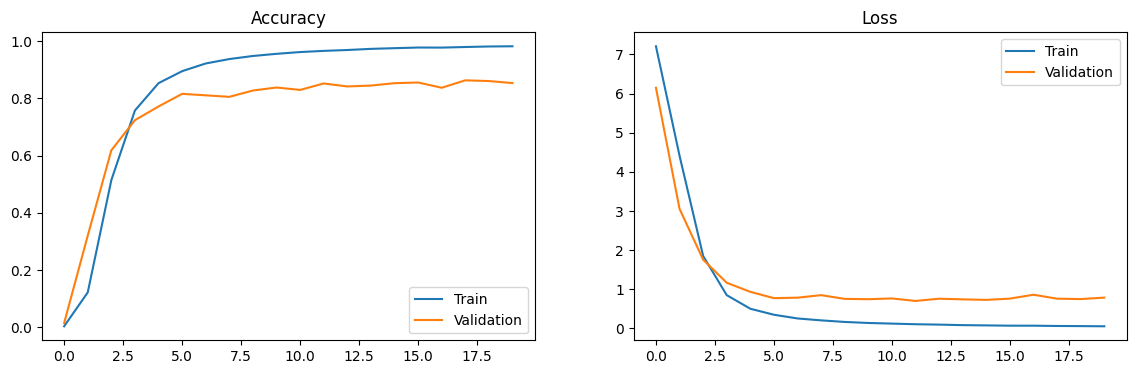

In [ ]:
Train_Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(Epochs)

plt.figure( figsize=(14,4) )
plt.subplot( 1,2,1 )
plt.plot( range( len(Train_Accuracy) ), Train_Accuracy, label='Train' )
plt.plot( range( len(Val_Accuracy) ), Val_Accuracy, label='Validation' )
plt.legend( loc='lower right' )
plt.title( 'Accuracy' )

plt.subplot( 1,2,2 )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train' )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Validation' )
plt.legend( loc='upper right' )
plt.title( 'Loss')

plt.show()

In [ ]:
# save model
os.chdir( '/content' )
CNN.save( 'CNN_Model.h5' )

# Testing

In [ ]:
Test_Data_Generator = ImageDataGenerator( rescale=1./255 )
Test_Generator = Test_Data_Generator.flow_from_directory( TestingDataPath,
                                                        target_size = Image_Size,
                                                        shuffle = False,
                                                        class_mode = 'categorical' )

In [ ]:
batch = 1
for data, label in Test_Generator:
    print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
    Plot_Generator( data, label )
    batch += 1
    if batch > 1:
        break

In [ ]:
Test_Generator.reset()

Predicts=CNN.predict(Test_Generator,verbose=1, steps =8)

In [ ]:
test_data, test_label = Test_Generator.next()

def Plot_Predict( img, labels=[], predicts=[], size=(20,2) ):
    plt.gcf().set_size_inches(size)
    ax = plt.subplot( )
    ax.imshow( img )
    ax.set_title( f'Predict={predicts.round(1)} \nLabel={labels}' )
    ax.set_xticks([]); ax.set_yticks([])
    plt.show()

for data, label, predict_label in zip(test_data,  test_label, Predicts):
    Plot_Predict( data, label, predict_label )